In [1]:
%matplotlib inline
import os

import cftime

import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import cmocean

import cartopy
import cartopy.crs as ccrs

import esmlab

import intake
import intake_esm
import ncar_jobqueue
from dask.distributed import Client
from pint import UnitRegistry

units = UnitRegistry()
units.define('micromoles_per_kilogram = umol / kg') # used in WOA datasets

%load_ext watermark
%watermark -a "Mike Levy" -d -iv -m -g -h

cartopy       0.17.0
xarray        0.14.0
cftime        1.0.3.4
cmocean       2.0
ncar_jobqueue 2019.10.16.1
numpy         1.17.3
intake        0.5.3
esmlab        2019.4.27.post55
intake_esm    2019.10.15.post40
matplotlib    3.1.2
Mike Levy 2019-12-04 

compiler   : GCC 7.3.0
system     : Linux
release    : 3.10.0-693.21.1.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 72
interpreter: 64bit
host name  : casper18
Git hash   : abfa5509ab9a00bba671ef2f89af129286081506


In [2]:
cluster = ncar_jobqueue.NCARCluster(project='P93300606')
client = Client(cluster)
client

Client Scheduler: tcp://128.117.181.224:40180 Dashboard: https://jupyterhub.ucar.edu/dav/user/mlevy/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [3]:
cluster.scale(4)

In [4]:
catalog = intake.open_esm_datastore('/glade/work/mlevy/intake-esm-collection/json/glade-cesm1-lens-timeseries.json')

In [5]:
lens_test = catalog.search(experiment=['CTRL', '20C', 'RCP85_BGC'], component='ocn', variable='TEMP')
lens_test.df

,experiment,case,component,stream,variable,date_range,member_id,path,ctrl_branch_year,ctrl_experiment,ctrl_member_id
0,CTRL,b.e11.B1850C5CN.f09_g16.005,ocn,pop.h,TEMP,040001-049912,0,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,1,No control experiment,-2147483647
1,CTRL,b.e11.B1850C5CN.f09_g16.005,ocn,pop.h,TEMP,050001-059912,0,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,1,No control experiment,-2147483647
2,CTRL,b.e11.B1850C5CN.f09_g16.005,ocn,pop.h,TEMP,060001-069912,0,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,1,No control experiment,-2147483647
3,CTRL,b.e11.B1850C5CN.f09_g16.005,ocn,pop.h,TEMP,070001-079912,0,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,1,No control experiment,-2147483647
4,CTRL,b.e11.B1850C5CN.f09_g16.005,ocn,pop.h,TEMP,080001-089912,0,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,1,No control experiment,-2147483647
...,...,...,...,...,...,...,...,...,...,...,...
112,RCP85_BGC,b.e11.BRCP85C5CNBDRD.f09_g16.101,ocn,pop.h,TEMP,200601-210012,29,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,20C,101
113,RCP85_BGC,b.e11.BRCP85C5CNBDRD.f09_g16.102,ocn,pop.h,TEMP,200601-210012,30,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,20C,103
114,RCP85_BGC,b.e11.BRCP85C5CNBDRD.f09_g16.103,ocn,pop.h,TEMP,200601-210012,31,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,20C,103
115,RCP85_BGC,b.e11.BRCP85C5CNBDRD.f09_g16.104,ocn,pop.h,TEMP,200601-210012,32,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,20C,104


In [6]:
dq = lens_test.to_dataset_dict(cdf_kwargs={'chunks':{'time': 48}})
dq

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'

--> There will be 3 group(s)


{'ocn.20C.pop.h': <xarray.Dataset>
 Dimensions:               (d2: 2, lat_aux_grid: 395, member_id: 40, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 1872, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
 Coordinates:
     TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     ULONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     ULAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
   * z_w                   (z_w) float32 0.0 1000.0 2000.0 ... 500004.7 525000.94
   * z_t                   (z_t) float32 500.0 1500.0 ... 512502.8 537500.0
   * z_t_150m              (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
   * z_w_top               (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
   * moc_z           

In [12]:
dq['ocn.20C.pop.h']

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, member_id: 40, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 1872, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 ... 500004.7 525000.94
  * z_t                   (z_t) float32 500.0 1500.0 ... 512502.8 537500.0
  * z_t_150m              (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w_top               (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
  * moc_z                 (moc_z) float32 0.0 100

In [13]:
# Lots of data in the dataset is un-necessary -- these are the variables we really want to keep
keep_vars = ['REGION_MASK', 'z_t', 'dz', 'TAREA', 'TLONG', 'TLAT', 'time', 'time_bound', 'member_id', 'TEMP']

# This should return everything from 1990s (01-15 instead of 01-01 looks weird but it's due to how date stamps / time bounds are kept)
time_slice = slice('1990-01-15', '2000-01-15')
ds = dq['ocn.20C.pop.h']
ds = ds.drop([v for v in ds.variables if v not in keep_vars]).sel(time=time_slice).mean(dim=['member_id', 'time'])
ds

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60)
Coordinates:
    TLONG        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT         (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * z_t          (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    REGION_MASK  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    dz           (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    TAREA        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TEMP         (z_t, nlat, nlon) float32 dask.array<chunksize=(60, 384, 320), meta=np.ndarray>
Attributes:
    history:                   Sun Sep  1 05:01:10 2013: /glade/apps/opt/nco/...
    cell_methods:              cell_methods = time: mean ==> the variable val...
    nsteps_total:              750
    intake_esm_varname:        TEMP
    revision:      

CPU times: user 26.7 s, sys: 2.29 s, total: 29 s
Wall time: 6min 10s


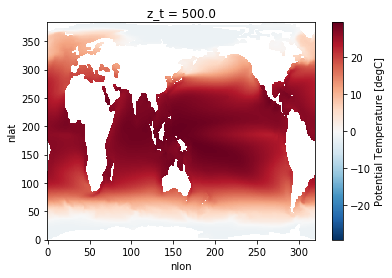

In [8]:
%%time

ds.isel(z_t=0).TEMP.plot()